# Import library

In [1]:
import pandas as pd
import datetime as datetime
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

# Data Load

In [2]:
ipc_data = pd.read_csv(r'C:\Users\moon_\DataAnalytics/ipc.csv')
ipc_data

,특허등록번호,보유IPC전체코드
0,9532496,A01B-063/00
1,9532496,A01B-071/02
2,9532496,A01C-007/20
3,9532497,A01B-061/04
4,9532497,A01B-063/10
...,...,...
1567238,9854719,H01L-023/552
1567239,9854719,H05K-009/00
1567240,9854720,H01Q-017/00
1567241,9854720,H04B-003/28


In [3]:
ipc_data['보유IPC전체코드'].str[:3].value_counts(ascending=False)[:10]

H04    238831
H01    185188
G06    171304
A61    152078
G01     68946
C07     47812
B60     38783
H02     33937
G02     32455
F16     30124
Name: 보유IPC전체코드, dtype: int64

data의 수가 적당해 보이는 A61 (위생학 분야) 선택

In [4]:
len(ipc_data[ipc_data['보유IPC전체코드'].str[:3] == 'A61']['특허등록번호'].unique())

37580

In [5]:
abstract_data = pd.read_csv(r'C:\Users\moon_\DataAnalytics/abstract.txt', sep='\t')
abstract_data

,특허등록번호,특허초록텍스트
0,9532496,A dynamic supplemental downforce control syste...
1,9532497,A harvesting header for use with a crop harves...
2,9532498,A seed planting machine for dispensing seed. T...
3,9532499,A gas monitoring system on an agricultural imp...
4,9532500,An apparatus for harvesting rhizomes includes ...
...,...,...
314786,9854716,A system and method of controlling a cooling f...
314787,9854717,A charger cooling air source selection method ...
314788,9854718,The invention provides systems and methods for...
314789,9854719,A patterned ground shield includes a plurality...


In [6]:
inventor_data = pd.read_csv(r'C:\Users\moon_\DataAnalytics/inventor.txt', sep='\t', engine='python')
inventor_data

,특허등록번호,발명자ID,발명자이름,발명자성씨
0,9532496,6463949-5,Derek A.,Sauder\r\n
1,9532496,7334532-4,Jeremy J.,Hodel\r\n
2,9532497,10034425-3,Emmanuel Regis,Magisson\r\n
3,9532497,5511498-1,Randy M.,Lohrentz\r\n
4,9532498,9532498-1,Keith W.,Finlayson\r\n
...,...,...,...,...
902455,9854719,10074587-1,Hsiao-Tsung,Yen\r\n
902456,9854719,10074587-3,Cheng-Wei,Luo\r\n
902457,9854720,10029450-6,Kyoung-Sik,Kim\r\n
902458,9854720,7616532-6,Jeonghoon,Yoo\r\n


In [7]:
assignee_data = pd.read_csv(r'C:\Users\moon_\DataAnalytics/assignee.txt', sep='\t', engine='python')
assignee_data

,특허등록번호,출원인ID,출원인이름,출원인성씨,출원인소속
0,9532496,org_thJgGtYIB6Okpse3uyeZ,NaN,NaN,Precision Planting LLC\r\n
1,9532497,org_rGsPEmN5PdH34U7rHYK7,NaN,NaN,AGCO GmbH & Co.\r\n
2,9532498,org_tE55mE8SjYRSk3E6empq,NaN,NaN,"Great Plains Manufacturing, Incorporated\r\n"
3,9532499,org_kpuqdJOjH9U2EivzyfJz,NaN,NaN,Deere & Comany\r\n
4,9532500,org_vxoy7IFXZd5fwds8DHIw,NaN,NaN,"Repreve Renewables, LLC\r\n"
...,...,...,...,...,...
310603,9854716,org_FWzt4nKvdw5HhQwmig3O,NaN,NaN,Dell Products L.L.P.\r\n
310604,9854717,org_9m4JSVri52MTwhzsfIkB,NaN,NaN,"Ford Global Technologie, LLC\r\n"
310605,9854718,org_xtMNpaYbm9atKzTIyEPq,NaN,NaN,"Clean Wave Technologies, Inc.\r\n"
310606,9854719,org_OW3mt7Gnq4UOKCLkQwn5,NaN,NaN,Realtex Semiconductor Corp.\r\n


In [8]:
us_patent_data = pd.read_csv(r'C:\Users\moon_\DataAnalytics/us_patent.txt', sep='\t', engine='python')
us_patent_data

,특허등록번호,특허등록일자,특허출원번호,특허출원일자,특허제목,보유IPC수,보유USPC수,보유CPC수,도면수,특허의후방인용수
0,9532496,20170103,14585764,20141230,Dynamic supplemental downforce control system ...,3,0,3,14,6
1,9532497,20170103,14398026,20130502,Variable precharge accumulator for agricultura...,6,0,6,6,10
2,9532498,20170103,14288006,20140527,Seeder with lockout clutch,5,0,5,11,2
3,9532499,20170103,14548962,20141120,System and method to monitor gaseous concentra...,2,0,2,10,18
4,9532500,20170103,14170573,20140201,Digger for rhizomes and the like,1,0,2,4,13
...,...,...,...,...,...,...,...,...,...,...
314786,9854716,20171226,13738765,20130110,System and method of controlling an air mover,5,0,4,5,13
314787,9854717,20171226,14033822,20130923,Charger cooling air source selection method,7,0,19,7,23
314788,9854718,20171226,15340336,20161101,Systems and methods for cooling of power elect...,5,0,5,2,6
314789,9854719,20171226,15233967,20160811,Patterned ground shield,3,0,3,10,8


In [9]:
us_patent_data['보유USPC수'].unique()

array([0], dtype=int64)

모든 row에 대하여 보유 USPC수는 0의 값을 띔.

In [10]:
citation_data = pd.read_csv(r'C:\Users\moon_\DataAnalytics/citation.txt')
citation_data

,특허등록번호,인용특허번호,인용특허등록연도,인용특허국가
0,9532496,2007-0089653,2007,US
1,9532496,2012-0048159,2012,US
2,9532496,2012-0060730,2012,US
3,9532496,6389999,2002,US
4,9532496,8634992,2014,US
...,...,...,...,...
13260875,9854720,3623099,1971,US
13260876,9854720,3780374,1973,US
13260877,9854720,4725475,1988,US
13260878,9854720,5416492,1995,US


In [11]:
citation_data[citation_data['특허등록번호'] == 9532496]

,특허등록번호,인용특허번호,인용특허등록연도,인용특허국가
0,9532496,2007-0089653,2007,US
1,9532496,2012-0048159,2012,US
2,9532496,2012-0060730,2012,US
3,9532496,6389999,2002,US
4,9532496,8634992,2014,US
5,9532496,8924102,2014,US


us_patent_data의 '특허의후방인용수'와 갯수가 동일함을 확인할 수 있다.

하나의 틍허등록번호에서 여러개의 row를 가질 수 있는 data: citation, inventor, ipc

# Data Cleansing

In [12]:
ipc_1 = ipc_data[ipc_data['보유IPC전체코드'].str[:3] == 'A61']
ipc_1

,특허등록번호,보유IPC전체코드
172,9532550,A61D-009/00
176,9532552,A61D-001/02
256,9532570,A61K-031/513
263,9532571,A61K-008/365
264,9532571,A61K-008/49
...,...,...
1565287,9854370,A61N-001/00
1565288,9854370,A61N-001/36
1565289,9854370,A61N-001/372
1566914,9854656,A61B-006/00


In [13]:
ipc_2 = ipc_1.drop_duplicates(['특허등록번호'], keep='first')
ipc_2

,특허등록번호,보유IPC전체코드
172,9532550,A61D-009/00
176,9532552,A61D-001/02
256,9532570,A61K-031/513
263,9532571,A61K-008/365
314,9532585,A61K-009/48
...,...,...
1563609,9854101,A61F-011/06
1564061,9854203,A61B-005/01
1565225,9854356,A61F-011/06
1565287,9854370,A61N-001/00


ipc_1에 위생학 분야 (A61로 시작하는 특허 IPC 코드)만을 추출하고, 그 중에서 특허등록번호의 unique값을 추출.

In [14]:
ipc_2 = ipc_2.drop(['보유IPC전체코드'], axis=1)
ipc_2

,특허등록번호
172,9532550
176,9532552
256,9532570
263,9532571
314,9532585
...,...
1563609,9854101
1564061,9854203
1565225,9854356
1565287,9854370


In [15]:
df_ver2 = pd.merge(ipc_2, us_patent_data, how='inner', on='특허등록번호')
df_ver2 = df_ver2.drop(['특허출원번호', '특허제목', '보유USPC수'], axis=1)
df_ver2

,특허등록번호,특허등록일자,특허출원일자,보유IPC수,보유CPC수,도면수,특허의후방인용수
0,9532550,20170103,20130903,2,1,16,3
1,9532552,20170103,20130402,2,2,5,26
2,9532570,20170103,20141230,9,7,0,31
3,9532571,20170103,20150710,16,20,0,37
4,9532585,20170103,20020116,5,5,0,38
...,...,...,...,...,...,...,...
37575,9854101,20171226,20160210,11,15,18,38
37576,9854203,20171226,20160506,11,36,20,2
37577,9854356,20171226,20150507,5,9,7,19
37578,9854370,20171226,20170228,7,12,7,20


In [16]:
inventor_data

,특허등록번호,발명자ID,발명자이름,발명자성씨
0,9532496,6463949-5,Derek A.,Sauder\r\n
1,9532496,7334532-4,Jeremy J.,Hodel\r\n
2,9532497,10034425-3,Emmanuel Regis,Magisson\r\n
3,9532497,5511498-1,Randy M.,Lohrentz\r\n
4,9532498,9532498-1,Keith W.,Finlayson\r\n
...,...,...,...,...
902455,9854719,10074587-1,Hsiao-Tsung,Yen\r\n
902456,9854719,10074587-3,Cheng-Wei,Luo\r\n
902457,9854720,10029450-6,Kyoung-Sik,Kim\r\n
902458,9854720,7616532-6,Jeonghoon,Yoo\r\n


In [17]:
inventor_num_df =pd.DataFrame(inventor_data['특허등록번호'].value_counts())
inventor_num_df.rename(columns={'특허등록번호' : '발명자수'},inplace=True)

inventor_num_df

,발명자수
9762553,53
9613190,53
9593129,42
9727622,36
9734217,36
...,...
9754438,1
9754436,1
9596946,1
9596947,1


In [18]:
inventor_num_df2 = inventor_num_df.reset_index()
inventor_num_df2.rename(columns={'index' : '특허등록번호'},inplace=True)

inventor_num_df2

,특허등록번호,발명자수
0,9762553,53
1,9613190,53
2,9593129,42
3,9727622,36
4,9734217,36
...,...,...
314785,9754438,1
314786,9754436,1
314787,9596946,1
314788,9596947,1


In [19]:
df_ver3 = pd.merge(df_ver2, inventor_num_df2, how='inner', on='특허등록번호')
df_ver3

,특허등록번호,특허등록일자,특허출원일자,보유IPC수,보유CPC수,도면수,특허의후방인용수,발명자수
0,9532550,20170103,20130903,2,1,16,3,1
1,9532552,20170103,20130402,2,2,5,26,1
2,9532570,20170103,20141230,9,7,0,31,3
3,9532571,20170103,20150710,16,20,0,37,2
4,9532585,20170103,20020116,5,5,0,38,2
...,...,...,...,...,...,...,...,...
37575,9854101,20171226,20160210,11,15,18,38,4
37576,9854203,20171226,20160506,11,36,20,2,3
37577,9854356,20171226,20150507,5,9,7,19,1
37578,9854370,20171226,20170228,7,12,7,20,1


In [20]:
df_ver4 = df_ver3.copy()

발명자 수까지 추출 완료.

In [21]:
df_ver4

,특허등록번호,특허등록일자,특허출원일자,보유IPC수,보유CPC수,도면수,특허의후방인용수,발명자수
0,9532550,20170103,20130903,2,1,16,3,1
1,9532552,20170103,20130402,2,2,5,26,1
2,9532570,20170103,20141230,9,7,0,31,3
3,9532571,20170103,20150710,16,20,0,37,2
4,9532585,20170103,20020116,5,5,0,38,2
...,...,...,...,...,...,...,...,...
37575,9854101,20171226,20160210,11,15,18,38,4
37576,9854203,20171226,20160506,11,36,20,2,3
37577,9854356,20171226,20150507,5,9,7,19,1
37578,9854370,20171226,20170228,7,12,7,20,1


In [22]:
df_ver4['특허등록일자'] = df_ver4['특허등록일자'].astype(str)
df_ver4_2 = pd.to_datetime(df_ver4['특허등록일자'])

df_ver4_2

0       2017-01-03
1       2017-01-03
2       2017-01-03
3       2017-01-03
4       2017-01-03
           ...    
37575   2017-12-26
37576   2017-12-26
37577   2017-12-26
37578   2017-12-26
37579   2017-12-26
Name: 특허등록일자, Length: 37580, dtype: datetime64[ns]

In [23]:
df_ver4['특허출원일자'] = df_ver4['특허출원일자'].astype(str)
df_ver4_3 = pd.to_datetime(df_ver4['특허출원일자'])

df_ver4_3

0       2013-09-03
1       2013-04-02
2       2014-12-30
3       2015-07-10
4       2002-01-16
           ...    
37575   2016-02-10
37576   2016-05-06
37577   2015-05-07
37578   2017-02-28
37579   2014-09-04
Name: 특허출원일자, Length: 37580, dtype: datetime64[ns]

In [24]:
df_ver4_4 = df_ver4_2 - df_ver4_3
df_ver4_4

0       1218 days
1       1372 days
2        735 days
3        543 days
4       5466 days
           ...   
37575    685 days
37576    599 days
37577    964 days
37578    301 days
37579   1209 days
Length: 37580, dtype: timedelta64[ns]

In [25]:
df_ver4_5 = df_ver4_4.dt.days
df_ver4_5

0        1218
1        1372
2         735
3         543
4        5466
         ... 
37575     685
37576     599
37577     964
37578     301
37579    1209
Length: 37580, dtype: int64

days를 뺀 수치형 변수로 변환

In [26]:
df_ver5 = pd.concat([df_ver4, df_ver4_5], axis=1)

df_ver5

,특허등록번호,특허등록일자,특허출원일자,보유IPC수,보유CPC수,도면수,특허의후방인용수,발명자수,0
0,9532550,20170103,20130903,2,1,16,3,1,1218
1,9532552,20170103,20130402,2,2,5,26,1,1372
2,9532570,20170103,20141230,9,7,0,31,3,735
3,9532571,20170103,20150710,16,20,0,37,2,543
4,9532585,20170103,20020116,5,5,0,38,2,5466
...,...,...,...,...,...,...,...,...,...
37575,9854101,20171226,20160210,11,15,18,38,4,685
37576,9854203,20171226,20160506,11,36,20,2,3,599
37577,9854356,20171226,20150507,5,9,7,19,1,964
37578,9854370,20171226,20170228,7,12,7,20,1,301


In [27]:
df_ver5 = df_ver5.set_axis(['특허등록번호', '특허등록일자', '특허출원일자', '보유IPC수', '보유CPC수', '도면수',
                 '특허의후방인용수', '발명자수', '특허승인소요기간'], axis=1)

df_ver5

,특허등록번호,특허등록일자,특허출원일자,보유IPC수,보유CPC수,도면수,특허의후방인용수,발명자수,특허승인소요기간
0,9532550,20170103,20130903,2,1,16,3,1,1218
1,9532552,20170103,20130402,2,2,5,26,1,1372
2,9532570,20170103,20141230,9,7,0,31,3,735
3,9532571,20170103,20150710,16,20,0,37,2,543
4,9532585,20170103,20020116,5,5,0,38,2,5466
...,...,...,...,...,...,...,...,...,...
37575,9854101,20171226,20160210,11,15,18,38,4,685
37576,9854203,20171226,20160506,11,36,20,2,3,599
37577,9854356,20171226,20150507,5,9,7,19,1,964
37578,9854370,20171226,20170228,7,12,7,20,1,301


In [28]:
df_ver6 = df_ver5.drop(['특허등록일자', '특허출원일자'], axis=1)

df_ver6

,특허등록번호,보유IPC수,보유CPC수,도면수,특허의후방인용수,발명자수,특허승인소요기간
0,9532550,2,1,16,3,1,1218
1,9532552,2,2,5,26,1,1372
2,9532570,9,7,0,31,3,735
3,9532571,16,20,0,37,2,543
4,9532585,5,5,0,38,2,5466
...,...,...,...,...,...,...,...
37575,9854101,11,15,18,38,4,685
37576,9854203,11,36,20,2,3,599
37577,9854356,5,9,7,19,1,964
37578,9854370,7,12,7,20,1,301


In [29]:
df_ver_back = df_ver6['특허의후방인용수']
df_ver6 = df_ver6.drop(['특허의후방인용수'], axis=1)

In [30]:
df_ver7 = pd.concat([df_ver6, df_ver_back], axis=1)

df_ver7

,특허등록번호,보유IPC수,보유CPC수,도면수,발명자수,특허승인소요기간,특허의후방인용수
0,9532550,2,1,16,1,1218,3
1,9532552,2,2,5,1,1372,26
2,9532570,9,7,0,3,735,31
3,9532571,16,20,0,2,543,37
4,9532585,5,5,0,2,5466,38
...,...,...,...,...,...,...,...
37575,9854101,11,15,18,4,685,38
37576,9854203,11,36,20,3,599,2
37577,9854356,5,9,7,1,964,19
37578,9854370,7,12,7,1,301,20


In [31]:
df_ver7.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37580 entries, 0 to 37579
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   특허등록번호    37580 non-null  int64
 1   보유IPC수    37580 non-null  int64
 2   보유CPC수    37580 non-null  int64
 3   도면수       37580 non-null  int64
 4   발명자수      37580 non-null  int64
 5   특허승인소요기간  37580 non-null  int64
 6   특허의후방인용수  37580 non-null  int64
dtypes: int64(7)
memory usage: 2.3 MB


In [32]:
fin_data = df_ver7.copy()

In [33]:
fin_data = fin_data.iloc[:, 1:]
fin_data

,보유IPC수,보유CPC수,도면수,발명자수,특허승인소요기간,특허의후방인용수
0,2,1,16,1,1218,3
1,2,2,5,1,1372,26
2,9,7,0,3,735,31
3,16,20,0,2,543,37
4,5,5,0,2,5466,38
...,...,...,...,...,...,...
37575,11,15,18,4,685,38
37576,11,36,20,3,599,2
37577,5,9,7,1,964,19
37578,7,12,7,1,301,20


특허등록번호는 inner join의 용도로 사용하였고, 다중회귀분석에서 사용할 수 없으므로 제거한다.

# 다중회귀분석 

In [34]:
import statsmodels.api as sm

C:\Users\moon_\anaconda3\lib\site-packages\statsmodels\compat\pandas.py:61: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import Int64Index as NumericIndex


In [35]:
# 변수 설정

Y = fin_data['특허의후방인용수']
X = fin_data.iloc[:, :-1]

데이터를 데이터 프레임의 형태로 각각의 변수에 저장해준다. 이는 선형 회귀 모형 (Y=B0 + X * B1)에서 X행렬의 역할을 한다.

In [36]:
#X 변수에 상수항 추가하기
X = sm.add_constant(X, has_constant='add')

#sm, OLS 적합시키기
model1 = sm.OLS(Y, X)
fitted_model1 = model1.fit()

In [37]:
fitted_model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               특허의후방인용수   R-squared:                       0.119
Model:                            OLS   Adj. R-squared:                  0.119
Method:                 Least Squares   F-statistic:                     1012.
Date:                Thu, 31 Mar 2022   Prob (F-statistic):               0.00
Time:                        15:45:32   Log-Likelihood:            -2.6600e+05
No. Observations:               37580   AIC:                         5.320e+05
Df Residuals:                   37574   BIC:                         5.321e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8761      4.061      0.216      0.829      -7.084       8.837
보유IPC수        -5.9196      0.459    -12.888      0.000      -6.820      -5.019
보유CPC수         5.5753      0.282     19.742      0.000       5.022       6.129
도면수            3.0910      0.053     58.114      0.000       2.987       3.195
발명자수           4.3806      0.633      6.917      0.000       3.139       5.622
특허승인소요기간       0.0033      0.002      1.649      0.099      -0.001       0.007
==============================================================================
Omnibus:                    55591.447   Durbin-Watson:                   1.577
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         23495385.405
Skew:                           9.122   Prob(JB):                         0.00
Kurtosis:                     124.129   Cond. No.                     3.92e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.92e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## 전진선택법

In [38]:
variables = fin_data.columns[:-1].tolist() ## 설명 변수 리스트

y = fin_data['특허의후방인용수'] ## 반응 변수
selected_variables = [] ## 선택된 변수들
sl_enter = 0.05

sv_per_step = [] ## 각 스텝별로 선택된 변수들
adjusted_r_squared = [] ## 각 스텝별 수정 결정계수
steps = [] ## 스텝

step = 0
while len(variables) > 0:
    remainder = list(set(variables) - set(selected_variables))
    pval = pd.Series(index = remainder) ## 변수의 p-value
    
    ## 기존에 포함된 변수와 새로운 변수를 돌아가며 선형 모형을 적합.
    for col in remainder:
        X_ = fin_data[selected_variables + [col]]
        X_ = sm.add_constant(X_)
        
        model = sm.OLS(y, X_).fit()
        pval[col] = model.pvalues[col]
        
        min_pval = pval.min()
    if min_pval < sl_enter: ## 최소 p-value의 값이 기준 값보다 작으면 포함
        selected_variables.append(pval.idxmin())
        
        step += 1
        steps.append(step)
        adj_r_squared = sm.OLS(y, sm.add_constant(fin_data[selected_variables]))
        adjusted_r_squared.append(adj_r_squared)
        sv_per_step.append(selected_variables.copy)
    else:
        break

C:\Users\Public\Documents\ESTsoft\CreatorTemp/ipykernel_11676/2844306888.py:14: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index = remainder) ## 변수의 p-value
C:\Users\Public\Documents\ESTsoft\CreatorTemp/ipykernel_11676/2844306888.py:14: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index = remainder) ## 변수의 p-value
C:\Users\Public\Documents\ESTsoft\CreatorTemp/ipykernel_11676/2844306888.py:14: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index = remainder) ## 변수의 p-value
C:\Users\Public\Documents\ESTsoft\CreatorTemp/ipykernel_11676/2844306888.py:14: FutureWarning: The default dtype for e

In [39]:
selected_variables

['도면수', '보유CPC수', '보유IPC수', '발명자수']

## 후진제거법

In [40]:
## 후진 제거법
variables = fin_data.columns[:-1].tolist() ## 설명 변수 리스트
 
y = fin_data['특허의후방인용수'] ## 반응 변수
selected_variables = variables ## 초기에는 모든 변수가 선택된 상태
sl_remove = 0.05
 
sv_per_step = [] ## 각 스텝별로 선택된 변수들
adjusted_r_squared = [] ## 각 스텝별 수정된 결정계수
steps = [] ## 스텝
step = 0
while len(selected_variables) > 0:
    X_ = sm.add_constant(fin_data[selected_variables])
    p_vals = sm.OLS(y,X_).fit().pvalues[1:] ## 절편항의 p-value는 뺀다
    max_pval = p_vals.max() ## 최대 p-value
    if max_pval >= sl_remove: ## 최대 p-value값이 기준값보다 크거나 같으면 제외
        remove_variable = p_vals.idxmax()
        selected_variables.remove(remove_variable)
 
        step += 1
        steps.append(step)
        adj_r_squared = sm.OLS(y,sm.add_constant(fin_data[selected_variables])).fit().rsquared_adj
        adjusted_r_squared.append(adj_r_squared)
        sv_per_step.append(selected_variables.copy())
    else:
        break

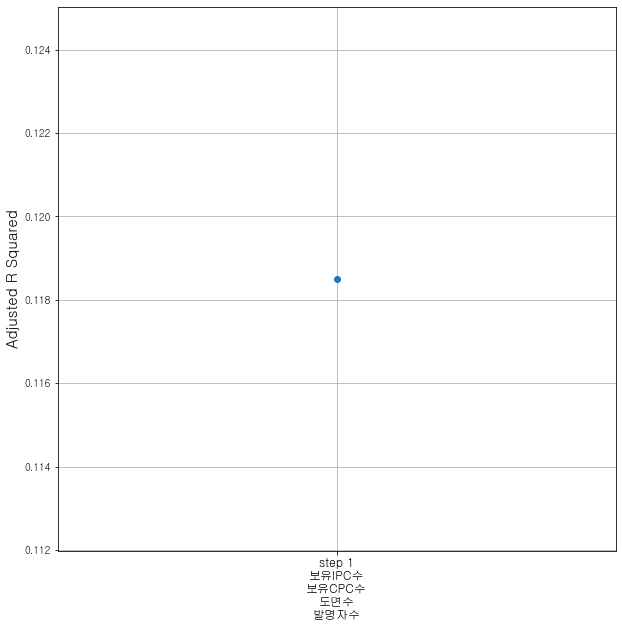

In [41]:
fig = plt.figure(figsize=(10,10))
fig.set_facecolor('white')
 
font_size = 15
plt.xticks(steps,[f'step {s}\n'+'\n'.join(sv_per_step[i]) for i,s in enumerate(steps)], fontsize=12)
plt.plot(steps,adjusted_r_squared, marker='o')
    
plt.ylabel('Adjusted R Squared',fontsize=font_size)
plt.grid(True)
plt.show()

## 단계적 선택법

In [42]:
## 전진 단계별 선택법
variables = fin_data.columns[:-1].tolist() ## 설명 변수 리스트
 
y = fin_data['특허의후방인용수'] ## 반응 변수
selected_variables = [] ## 선택된 변수들
sl_enter = 0.05
sl_remove = 0.05
 
sv_per_step = [] ## 각 스텝별로 선택된 변수들
adjusted_r_squared = [] ## 각 스텝별 수정된 결정계수
steps = [] ## 스텝
step = 0
while len(variables) > 0:
    remainder = list(set(variables) - set(selected_variables))
    pval = pd.Series(index=remainder) ## 변수의 p-value
    ## 기존에 포함된 변수와 새로운 변수 하나씩 돌아가면서 
    ## 선형 모형을 적합한다.
    for col in remainder: 
        X_ = fin_data[selected_variables+[col]]
        X_ = sm.add_constant(X_)
        model = sm.OLS(y,X_).fit()
        pval[col] = model.pvalues[col]
 
    min_pval = pval.min()
    if min_pval < sl_enter: ## 최소 p-value 값이 기준 값보다 작으면 포함
        selected_variables.append(pval.idxmin())
        ## 선택된 변수들에대해서
        ## 어떤 변수를 제거할지 고른다.
        while len(selected_variables) > 0:
            selected_X = fin_data[selected_variables]
            selected_X = sm.add_constant(selected_X)
            selected_pval = sm.OLS(y,selected_X).fit().pvalues[1:] ## 절편항의 p-value는 뺀다
            max_pval = selected_pval.max()
            if max_pval >= sl_remove: ## 최대 p-value값이 기준값보다 크거나 같으면 제외
                remove_variable = selected_pval.idxmax()
                selected_variables.remove(remove_variable)
            else:
                break
        
        step += 1
        steps.append(step)
        adj_r_squared = sm.OLS(y,sm.add_constant(fin_data[selected_variables])).fit().rsquared_adj
        adjusted_r_squared.append(adj_r_squared)
        sv_per_step.append(selected_variables.copy())
    else:
        break

C:\Users\Public\Documents\ESTsoft\CreatorTemp/ipykernel_11676/1975337783.py:15: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder) ## 변수의 p-value
C:\Users\Public\Documents\ESTsoft\CreatorTemp/ipykernel_11676/1975337783.py:15: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder) ## 변수의 p-value
C:\Users\Public\Documents\ESTsoft\CreatorTemp/ipykernel_11676/1975337783.py:15: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder) ## 변수의 p-value
C:\Users\Public\Documents\ESTsoft\CreatorTemp/ipykernel_11676/1975337783.py:15: FutureWarning: The default dtype for empty S

In [43]:
selected_variables

['도면수', '보유CPC수', '보유IPC수', '발명자수']

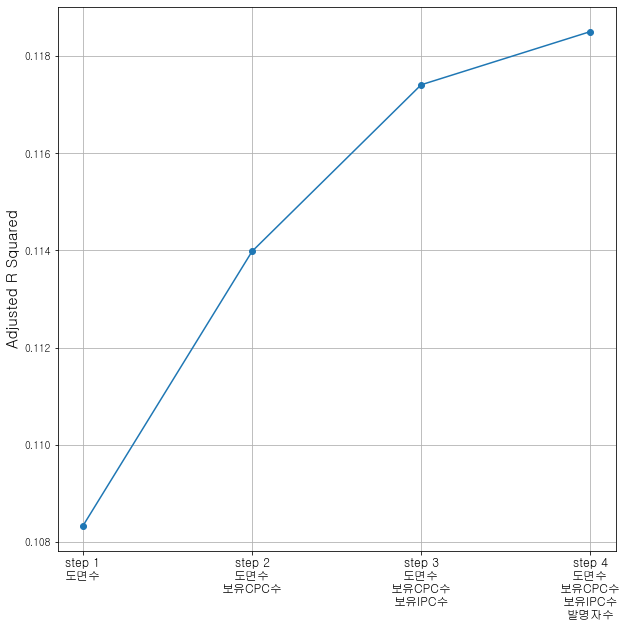

In [44]:
fig = plt.figure(figsize=(10,10))
fig.set_facecolor('white')
 
font_size = 15
plt.xticks(steps,[f'step {s}\n'+'\n'.join(sv_per_step[i]) for i,s in enumerate(steps)], fontsize=12)
plt.plot(steps,adjusted_r_squared, marker='o')
    
plt.ylabel('Adjusted R Squared',fontsize=font_size)
plt.grid(True)
plt.show()

## 다중회귀분석 2nd try

In [55]:
# 변수 설정

Y = fin_data['특허의후방인용수']
X = fin_data.iloc[:, :-2]

In [56]:
X

,보유IPC수,보유CPC수,도면수,발명자수
0,2,1,16,1
1,2,2,5,1
2,9,7,0,3
3,16,20,0,2
4,5,5,0,2
...,...,...,...,...
37575,11,15,18,4
37576,11,36,20,3
37577,5,9,7,1
37578,7,12,7,1


In [57]:
#X 변수에 상수항 추가하기
X = sm.add_constant(X, has_constant='add')

#sm, OLS 적합시키기
model2 = sm.OLS(Y, X)
fitted_model2 = model2.fit()

In [58]:
fitted_model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               특허의후방인용수   R-squared:                       0.119
Model:                            OLS   Adj. R-squared:                  0.119
Method:                 Least Squares   F-statistic:                     1264.
Date:                Thu, 31 Mar 2022   Prob (F-statistic):               0.00
Time:                        15:48:01   Log-Likelihood:            -2.6600e+05
No. Observations:               37580   AIC:                         5.320e+05
Df Residuals:                   37575   BIC:                         5.321e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.2616      3.070      1.714      0.087      -0.756      11.279
보유IPC수        -5.9541      0.459    -12.976      0.000      -6.853      -5.055
보유CPC수         5.5640      0.282     19.707      0.000       5.011       6.117
도면수            3.0898      0.053     58.096      0.000       2.986       3.194
발명자수           4.3712      0.633      6.902      0.000       3.130       5.612
==============================================================================
Omnibus:                    55595.095   Durbin-Watson:                   1.577
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         23500518.602
Skew:                           9.123   Prob(JB):                         0.00
Kurtosis:                     124.142   Cond. No.                         75.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## 다중공선성 확인

In [49]:
X.iloc[:, 1:-1]

,보유IPC수,보유CPC수,도면수
0,2,1,16
1,2,2,5
2,9,7,0
3,16,20,0
4,5,5,0
...,...,...,...
37575,11,15,18
37576,11,36,20
37577,5,9,7
37578,7,12,7


In [50]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 

# VIF사용을 위한 라이브러리, statsmodels안에 존재한다.
# 사실 모든 통계기법이 statsmodels 모듈에 존재하여 
# 이 중에 필요한 통계기법을 찾아 import를 진행하면 된다.

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.iloc[:, 1:-1].values, i) for i in range(X.iloc[:, 1:-1].shape[1])]
vif["features"] = X.iloc[:, 1:-1].columns
vif

,VIF Factor,features
0,4.843697,보유IPC수
1,5.486016,보유CPC수
2,1.429455,도면수


In [51]:
X.iloc[:, 1:-1].corr()

,보유IPC수,보유CPC수,도면수
보유IPC수,1.000000,0.722869,0.024172
보유CPC수,0.722869,1.000000,0.220712
도면수,0.024172,0.220712,1.000000


보유IPC수와 보유CPC수의 상관계수가 강한 상관관계를 가짐을 확인할 수 있었다.

## 다중회귀분석 3rd try

In [52]:
# 변수 설정

Y = fin_data['특허의후방인용수']
X = fin_data[['보유IPC수', '도면수', '발명자수']]

In [53]:
#X 변수에 상수항 추가하기
X = sm.add_constant(X, has_constant='add')

#sm, OLS 적합시키기
model3 = sm.OLS(Y, X)
fitted_model3 = model3.fit()

In [54]:
fitted_model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               특허의후방인용수   R-squared:                       0.109
Model:                            OLS   Adj. R-squared:                  0.109
Method:                 Least Squares   F-statistic:                     1540.
Date:                Thu, 31 Mar 2022   Prob (F-statistic):               0.00
Time:                        15:45:36   Log-Likelihood:            -2.6620e+05
No. Observations:               37580   AIC:                         5.324e+05
Df Residuals:                   37576   BIC:                         5.324e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.8697      3.061      4.204      0.000       6.869      18.870
보유IPC수         0.6789      0.313      2.166      0.030       0.064       1.293
도면수            3.4005      0.051     66.604      0.000       3.300       3.501
발명자수           3.8885      0.636      6.113      0.000       2.642       5.135
==============================================================================
Omnibus:                    55495.093   Durbin-Watson:                   1.578
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         23223015.362
Skew:                           9.094   Prob(JB):                         0.00
Kurtosis:                     123.417   Cond. No.                         73.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""